In [1]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import numpy as np
import pandas as pd
import csv

df = pd.read_csv("Amazon_Unlocked_Mobile_without_duplicates.csv")




C:\Users\matth\AppData\Local\Programs\Python\Python38\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
df = df.sample(frac=0.1, random_state = 5)
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
324367,Samsung Galaxy Note 3 N9005 32GB 4G LTE WHITE ...,NaN,313.05,5,This was a gift and it is loved actually Aweso...,0.0
54699,Apple iPhone 6 a1549 64GB Space Gray Unlocked ...,NaN,419.99,5,Absolutely LOVE my new iPhone 6! Works perfect!,0.0
51308,Apple iPhone 6 128GB Factory Unlocked GSM 4G L...,NaN,417.35,5,My phone came in awesome condition. It says th...,2.0
237255,LG Revolution 4G Android Phone (Verizon Wireless),LG,38.95,1,This phone is great until it dies. Everytime t...,2.0
151703,BLU Studio C Super Camera -Unlocked Smartphone...,BLU,99.96,1,Garbage just throw it away waste your money,0.0


In [3]:
df.dropna(inplace=True)
df=df[df['Rating']!=3]

df['Positively Rated'] = np.where(df['Rating']>3,1,0)
df.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively Rated
237255,LG Revolution 4G Android Phone (Verizon Wireless),LG,38.95,1,This phone is great until it dies. Everytime t...,2.0,0
151703,BLU Studio C Super Camera -Unlocked Smartphone...,BLU,99.96,1,Garbage just throw it away waste your money,0.0,0
243852,Moto G Plus (4th Gen.) Unlocked - Black - 64GB...,Motorola,299.00,5,Very Good Phone!!!,1.0,1
11089,Apple iPhone 4S 16GB (Black) - Locked to Sprint,Apple,53.00,5,"even nicer than the rating, works perfect, wil...",0.0,1
71630,"Apple iPhone 6S Plus Unlocked Smartphone, 64 G...",Apple,26.41,1,The phone was sealed in a bag that said 32gb b...,1.0,0
407575,Verizon LG VX10000 Voyager with Touch Screen &...,LG,14.44,5,Nice,0.0,1
153134,"BLU Studio M HD 16GB - 5.0"" Smartphone -US GSM...",BLU,79.99,1,I have purchased other Blu phones in the past ...,0.0,0
21235,Apple iPhone 5 64GB (White) - Verizon Wireless,Apple,139.95,5,"I already had an iphone 4, so I change it for ...",2.0,1
292243,Polaroid A1BK Unlocked Phone Dual SIM GSM With...,Polaroid,29.30,1,This product has been very hard for my son to ...,0.0,0
294610,Posh Mobile Icon S510-B GSM Unlocked 4G HSDPA+...,Posh Mobile,68.00,1,Phone wont even turn on.?,0.0,0


[Text(0, 0.5, 'Rating 5'),
 Text(0.5, 0, 'Rating 4'),
 Text(0.5, 1.0, 'Rating 4 vs Rating 5')]

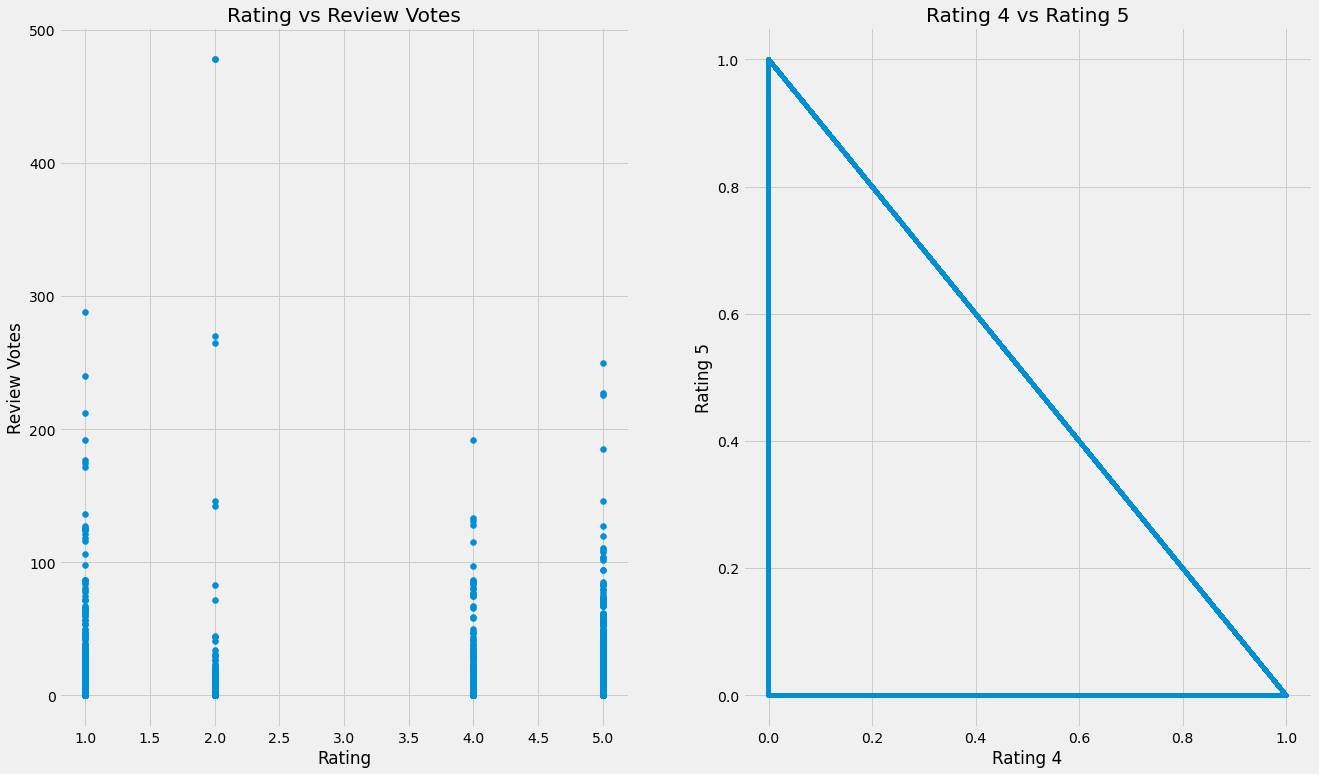

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = (20,12))
ax0.scatter(df['Rating'],df['Review Votes'])
ax0.set(title= 'Rating vs Review Votes', xlabel = 'Rating', ylabel = 'Review Votes')
ax1.plot(df['Rating']==4, df['Rating']==5)
ax1.set(title='Rating 4 vs Rating 5', xlabel='Rating 4', ylabel='Rating 5');


In [5]:
df['Positively Rated'].mean()

0.7478300297966057

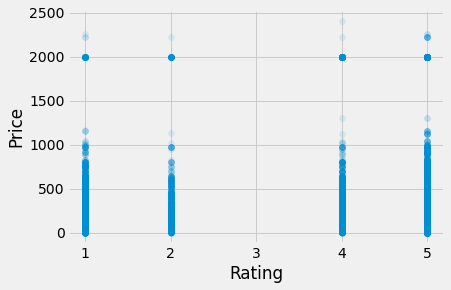

In [6]:
ylabel = df['Price']
plt.ylabel("Price")
plt.xlabel("Rating")
xlabel = df["Rating"]
plt.scatter(xlabel, ylabel, alpha =0.1)
plt.show()

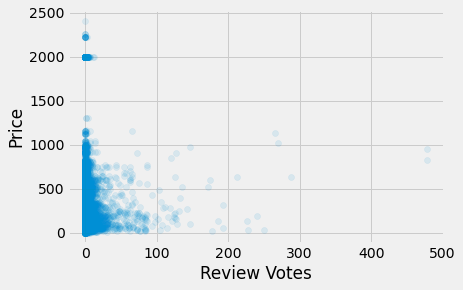

In [7]:
ylabel2 = df["Price"]
plt.ylabel("Price")
xlabel2=df["Review Votes"]
plt.xlabel("Review Votes")
plt.scatter(xlabel2, ylabel2, alpha=0.1)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X = df['Reviews']
y = df['Positively Rated']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print('X_train first entry:\n', X_train.iloc[0])
print('\nX_train shape', X_train.shape)

df['Positively Rated'].value_counts()

X_train first entry:
 I got tired of giving Apple all my money and decided to switch from my iPhone 6 to an affordable Android phone. I like Amazon a lot and had considered the Blu, but I'm on Verizon, so I couldn't. When the announced the Play for only $99, it was a no brainer.If you're looking for a review comparing how this phone handles Android vs other phones, stop now. I wouldn't know. This is really about my experience switching from ios. So, how was it? Easy! I was very pleased and very surprised. I had 90% of the phone's operation down within a couple hours. Within a couple days, I was at 95%. It was fairly intuitive.So, about the phone itself. I like the size. It's a little bigger than my iPhone, so it wasn't too much of a transition. I didn't want a big phone. The screen resolution was great except in direct sunlight. I didn't care for the placement of the buttons on the side. I kept turning off the screen when I was trying to adjust the volume. The battery life is excellent

1    23090
0     7786
Name: Positively Rated, dtype: int64

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(X_train)

vect.get_feature_names()[::2000]

['00',
 'argh',
 'colleague',
 'ducked',
 'gliching',
 'krishna',
 'obligation',
 'rate',
 'slowing',
 'tudia']

In [15]:
len(vect.get_feature_names())

19669

In [16]:
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<23157x19669 sparse matrix of type '<class 'numpy.int64'>'
	with 611392 stored elements in Compressed Sparse Row format>

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

C:\Users\matth\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve

predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test,predictions))

AUC:  0.8909354065798831


In [20]:
feature_names = np.array(vect.get_feature_names())
# ^above... gets feature names as np (numpy) array
# sorts coefficient from model
sorted_coef_index =model.coef_[0].argsort()

print('Smallest Coefficient (Negative reviews): \n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefficient (Positive reviews): \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefficient (Negative reviews): 
['horrible' 'worst' 'junk' 'waste' 'slow' 'disappointing' 'return' 'poor'
 'suppose' 'broken']

Largest Coefficient (Positive reviews): 
['excellent' 'excelent' 'excelente' 'love' 'awesome' 'perfect' 'loves'
 'great' 'amazing' 'perfectly']
